In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')

In [9]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [10]:
data.drop(columns='Id', axis = 1, inplace= True)

In [11]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [12]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

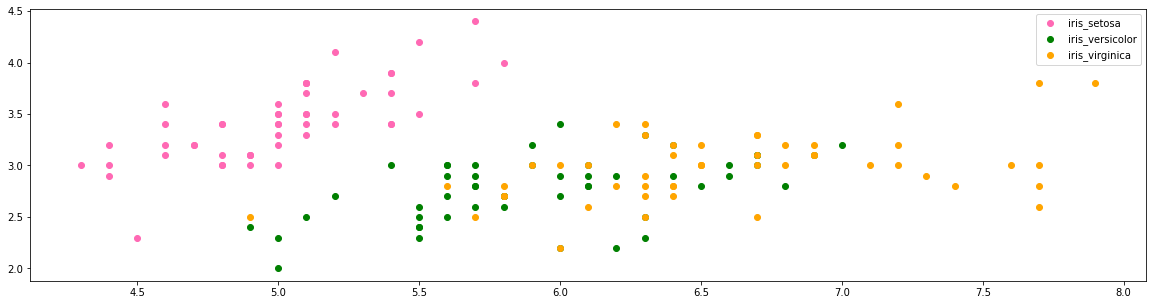

In [17]:
iris_setosa = data[data[list(data.columns)[-1]] == 'Iris-setosa']
iris_versicolor = data[data[list(data.columns)[-1]] == 'Iris-versicolor']
iris_virginica = data[data[list(data.columns)[-1]] == 'Iris-virginica']
fig, axes = plt.subplots(1,1, figsize = (20,5))
plt.scatter(iris_setosa['SepalLengthCm'],iris_setosa['SepalWidthCm'], c = 'hotpink', label = 'iris_setosa')
plt.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], c = 'green' ,  label = 'iris_versicolor')
plt.scatter(iris_virginica['SepalLengthCm'], iris_virginica['SepalWidthCm'], c = 'orange', label = 'iris_virginica')
plt.legend()
plt.show()

In [23]:
X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
print(X)
print(Y)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
scaledX

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaledX, encodedY, test_size= 0.25, random_state= 3)



In [28]:
from sklearn import svm
svm_cls = svm.SVC(kernel= 'poly')
svm_cls.fit(xtrain,ytrain)
ypred = svm_cls.predict(xtest)

ypred == ytest


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
svm_clsr = svm.SVC(kernel= 'rbf')
svm_clsr.fit(xtrain,ytrain)
ypredr = svm_clsr.predict(xtest)

ypredr == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False])

In [33]:
svm_clsl = svm.SVC(kernel= 'linear')
svm_clsl.fit(xtrain,ytrain)
ypredl = svm_clsl.predict(xtest)

ypredl == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [36]:
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ypred,ytest))
print('F1_score:', f1_score(ypredl, ytest, average=None))

Confusion Matrix: 
 [[15  0  0]
 [ 0 10  0]
 [ 0  2 11]]
F1_score: [1.         0.90909091 0.91666667]


In [37]:
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ypred,ytest))
print('F1_score:', f1_score(ypred, ytest, average=None))

Confusion Matrix: 
 [[15  0  0]
 [ 0 10  0]
 [ 0  2 11]]
F1_score: [1.         0.90909091 0.91666667]


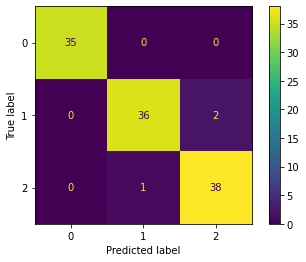

In [38]:
from sklearn import metrics
metrics.plot_confusion_matrix(svm_cls, xtrain, ytrain)

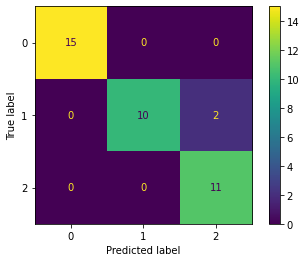

In [39]:
metrics.plot_confusion_matrix(svm_cls,xtest,ytest)

In [41]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import cross_val_score
cv = cross_val_score(
    svm_cls,scaledX,encodedY, cv = 4, scoring='accuracy'
)
cv.mean()

0.9667496443812233

In [43]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [46]:
from sklearn.model_selection import RandomizedSearchCV
svm_model = svm.SVC()
model = RandomizedSearchCV(
    svm_model,
    param_distributions={
        'C': list(range(3,int(np.sqrt(150)),3)),
        'max_iter':list(range(100,3000, 100)),
        'kernel':['linear','rbf', 'poly'],
        'degree': [2,3,4,5,6],
        'gamma': ['scale', 'auto'],
        'decision_function_shape': ['ovr', 'ovo']

    },
    cv = 5, scoring ='accuracy', n_jobs=-1, verbose=3
)
model.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [3, 6, 9],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [2, 3, 4, 5, 6],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200, 1300, 1400,
                                                     1500, 1600, 1700, 1800,
                                                     1900, 2000, 2100, 2200,
                                                     2300, 2400, 2500, 2600,
                                                     2700, 2800

In [47]:
model.best_params_

{'max_iter': 1900,
 'kernel': 'linear',
 'gamma': 'auto',
 'degree': 4,
 'decision_function_shape': 'ovo',
 'C': 3}

In [48]:
final_model = model.best_estimator_
final_model

SVC(C=3, decision_function_shape='ovo', degree=4, gamma='auto', kernel='linear',
    max_iter=1900)

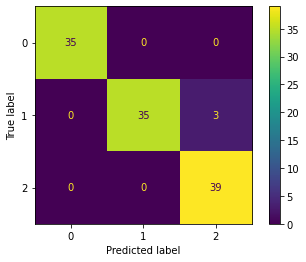

In [49]:
metrics.plot_confusion_matrix(final_model,xtrain,ytrain)

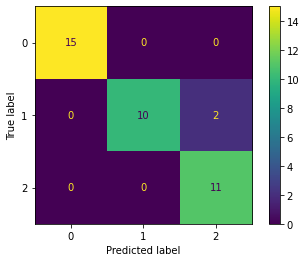

In [50]:
metrics.plot_confusion_matrix(final_model,xtest,ytest)

In [ ]:
scaledX[:, :2][:,0]
scaledX[:,:2][:, 1]

No handles with labels found to put in legend.


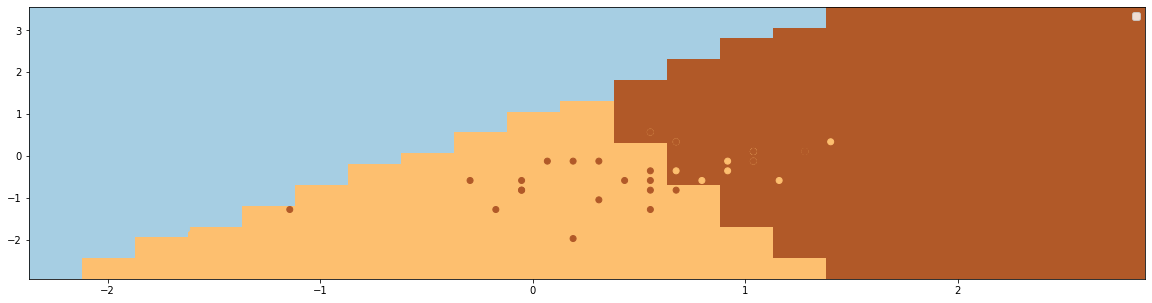

In [63]:
svmclf = model.best_estimator_
svmclf.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:,0].min() - 0.5, scaledX[:, 0].max() + 0.5
ymin, ymax = scaledX[:, 1].min() - 0.5 , scaledX[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.25), np.arange(ymin, ymax,0.25)
)
z = svmclf.predict(np.c_[xx.ravel(), yy.ravel()])
z
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy, z)

plt.scatter(scaledX[:,0],scaledX[:,1], c = encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()